In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply


In [4]:
cols = ['MarketName','commodity','variety','Modal price','Date']
drop_col = ['Sl no.','District Name','Grade','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)']

In [5]:
data = pd.read_csv('garlicmp.csv',parse_dates=True)



data

,Market,Arrival Date,Arrivals (Tonnes),Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,A lot,4/1/2022,96.23,Desi,800,2500,1600
1,NaN,5/1/2022,103.52,Desi,600,1800,850
2,NaN,10/1/2022,143.46,Desi,600,2192,1200
3,NaN,11/1/2022,196.56,Desi,300,1921,1200
4,NaN,13/01/2022,186.35,Desi,200,1821,1100
...,...,...,...,...,...,...,...
12147,NaN,13/04/2023,307.10,Garlic,561,6000,2889
12148,NaN,24/04/2023,158.50,Garlic,600,6700,3110
12149,NaN,25/04/2023,229.60,Garlic,750,7100,3367
12150,NaN,28/04/2023,69.60,Garlic,699,7200,4185


In [6]:
data = data.fillna(method='ffill')

C:\Users\yuvra\AppData\Local\Temp\ipykernel_18440\917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [7]:
data = data.drop(['Variety','Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)'],axis=1)
data

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal)
0,A lot,4/1/2022,96.23,1600
1,A lot,5/1/2022,103.52,850
2,A lot,10/1/2022,143.46,1200
3,A lot,11/1/2022,196.56,1200
4,A lot,13/01/2022,186.35,1100
...,...,...,...,...
12147,Ujjain(F&V),13/04/2023,307.10,2889
12148,Ujjain(F&V),24/04/2023,158.50,3110
12149,Ujjain(F&V),25/04/2023,229.60,3367
12150,Ujjain(F&V),28/04/2023,69.60,4185


In [8]:
mydata = data[data['Market'] == 'Thandla']
mydata.shape


(467, 4)

In [9]:
i = mydata[mydata['Modal Price(Rs./Quintal)'] == 'NR'].index

In [10]:
i

Index([ 3070,  3071,  3072,  3073,  3074,  3075,  3076,  3835,  3836,  3837,
        3838,  4605,  4606,  4607,  4608,  4609,  4610,  4611,  4612,  4613,
        4614,  4615,  4616,  4617,  4618,  4619,  4620,  4621,  4622,  4623,
        4624,  4625,  4626,  4627,  4628,  4629,  4630,  4631,  4632,  4633,
       11366, 11367, 11368],
      dtype='int64')

In [11]:
mydata = mydata.drop(i)

In [12]:
mydata[mydata['Arrival Date'] == '01-02-2022']

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal)


In [13]:
mydata['Arrival Date'] = pd.to_datetime(mydata['Arrival Date'],dayfirst=True)

In [14]:
mydata   = mydata.sort_values(by='Arrival Date')


In [15]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal)
734,Thandla,2022-01-02,2.40,3500
735,Thandla,2022-01-03,3.00,3500
736,Thandla,2022-01-04,3.00,3500
737,Thandla,2022-01-05,3.00,3500
738,Thandla,2022-01-06,3.00,3500
...,...,...,...,...
12132,Thandla,2023-04-26,0.12,1800
12133,Thandla,2023-04-27,0.13,1800
12134,Thandla,2023-04-28,0.15,1800
12135,Thandla,2023-04-29,0.11,1800


In [16]:
idx = pd.date_range('01-01-2022','30-04-2023')

In [17]:
mydata['Datereal'] = mydata['Arrival Date'].apply(lambda x : x.strftime('%Y%m%d'))

In [18]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal
734,Thandla,2022-01-02,2.40,3500,20220102
735,Thandla,2022-01-03,3.00,3500,20220103
736,Thandla,2022-01-04,3.00,3500,20220104
737,Thandla,2022-01-05,3.00,3500,20220105
738,Thandla,2022-01-06,3.00,3500,20220106
...,...,...,...,...,...
12132,Thandla,2023-04-26,0.12,1800,20230426
12133,Thandla,2023-04-27,0.13,1800,20230427
12134,Thandla,2023-04-28,0.15,1800,20230428
12135,Thandla,2023-04-29,0.11,1800,20230429


In [19]:
mydata.shape

(424, 5)

In [20]:
mydata.index = np.arange(len(mydata.index))

In [21]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal
0,Thandla,2022-01-02,2.40,3500,20220102
1,Thandla,2022-01-03,3.00,3500,20220103
2,Thandla,2022-01-04,3.00,3500,20220104
3,Thandla,2022-01-05,3.00,3500,20220105
4,Thandla,2022-01-06,3.00,3500,20220106
...,...,...,...,...,...
419,Thandla,2023-04-26,0.12,1800,20230426
420,Thandla,2023-04-27,0.13,1800,20230427
421,Thandla,2023-04-28,0.15,1800,20230428
422,Thandla,2023-04-29,0.11,1800,20230429


In [22]:
mydata['Ma30'] = mydata['Modal Price(Rs./Quintal)'].rolling(window=30).mean()
mydata['Ma12'] = mydata['Modal Price(Rs./Quintal)'].rolling(window=12).mean()

In [23]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal,Ma30,Ma12
0,Thandla,2022-01-02,2.40,3500,20220102,NaN,NaN
1,Thandla,2022-01-03,3.00,3500,20220103,NaN,NaN
2,Thandla,2022-01-04,3.00,3500,20220104,NaN,NaN
3,Thandla,2022-01-05,3.00,3500,20220105,NaN,NaN
4,Thandla,2022-01-06,3.00,3500,20220106,NaN,NaN
...,...,...,...,...,...,...,...
419,Thandla,2023-04-26,0.12,1800,20230426,1693.333333,1800.0
420,Thandla,2023-04-27,0.13,1800,20230427,1720.000000,1800.0
421,Thandla,2023-04-28,0.15,1800,20230428,1746.666667,1800.0
422,Thandla,2023-04-29,0.11,1800,20230429,1773.333333,1800.0


In [24]:
mydata


,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal,Ma30,Ma12
0,Thandla,2022-01-02,2.40,3500,20220102,NaN,NaN
1,Thandla,2022-01-03,3.00,3500,20220103,NaN,NaN
2,Thandla,2022-01-04,3.00,3500,20220104,NaN,NaN
3,Thandla,2022-01-05,3.00,3500,20220105,NaN,NaN
4,Thandla,2022-01-06,3.00,3500,20220106,NaN,NaN
...,...,...,...,...,...,...,...
419,Thandla,2023-04-26,0.12,1800,20230426,1693.333333,1800.0
420,Thandla,2023-04-27,0.13,1800,20230427,1720.000000,1800.0
421,Thandla,2023-04-28,0.15,1800,20230428,1746.666667,1800.0
422,Thandla,2023-04-29,0.11,1800,20230429,1773.333333,1800.0


In [25]:
import plotly.express as px
fig = px.line(mydata, x="Datereal", y=["Ma12","Ma30"], template = 'plotly_dark')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
mydata['Month'] = [i.month for i in mydata['Arrival Date']]
mydata['Year'] = [i.year for i in mydata['Arrival Date']]

In [ ]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal,Ma30,Ma12,Month,Year
0,Thandla,2022-01-02,2.40,3500,20220102,NaN,NaN,1,2022
1,Thandla,2022-01-03,3.00,3500,20220103,NaN,NaN,1,2022
2,Thandla,2022-01-04,3.00,3500,20220104,NaN,NaN,1,2022
3,Thandla,2022-01-05,3.00,3500,20220105,NaN,NaN,1,2022
4,Thandla,2022-01-06,3.00,3500,20220106,NaN,NaN,1,2022
...,...,...,...,...,...,...,...,...,...
419,Thandla,2023-04-26,0.12,1800,20230426,1693.333333,1800.0,4,2023
420,Thandla,2023-04-27,0.13,1800,20230427,1720.000000,1800.0,4,2023
421,Thandla,2023-04-28,0.15,1800,20230428,1746.666667,1800.0,4,2023
422,Thandla,2023-04-29,0.11,1800,20230429,1773.333333,1800.0,4,2023


In [ ]:
mydata['Series'] = np.arange(1,len(mydata)+1)

In [ ]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal,Ma30,Ma12,Month,Year,Series
0,Thandla,2022-01-02,2.40,3500,20220102,NaN,NaN,1,2022,1
1,Thandla,2022-01-03,3.00,3500,20220103,NaN,NaN,1,2022,2
2,Thandla,2022-01-04,3.00,3500,20220104,NaN,NaN,1,2022,3
3,Thandla,2022-01-05,3.00,3500,20220105,NaN,NaN,1,2022,4
4,Thandla,2022-01-06,3.00,3500,20220106,NaN,NaN,1,2022,5
...,...,...,...,...,...,...,...,...,...,...
419,Thandla,2023-04-26,0.12,1800,20230426,1693.333333,1800.0,4,2023,420
420,Thandla,2023-04-27,0.13,1800,20230427,1720.000000,1800.0,4,2023,421
421,Thandla,2023-04-28,0.15,1800,20230428,1746.666667,1800.0,4,2023,422
422,Thandla,2023-04-29,0.11,1800,20230429,1773.333333,1800.0,4,2023,423


In [ ]:
mydata.drop([ 'Ma12','Ma30'], axis=1, inplace=True)

In [ ]:
mydata

,Market,Arrival Date,Arrivals (Tonnes),Modal Price(Rs./Quintal),Datereal,Month,Year,Series
0,Thandla,2022-01-02,2.40,3500,20220102,1,2022,1
1,Thandla,2022-01-03,3.00,3500,20220103,1,2022,2
2,Thandla,2022-01-04,3.00,3500,20220104,1,2022,3
3,Thandla,2022-01-05,3.00,3500,20220105,1,2022,4
4,Thandla,2022-01-06,3.00,3500,20220106,1,2022,5
...,...,...,...,...,...,...,...,...
419,Thandla,2023-04-26,0.12,1800,20230426,4,2023,420
420,Thandla,2023-04-27,0.13,1800,20230427,4,2023,421
421,Thandla,2023-04-28,0.15,1800,20230428,4,2023,422
422,Thandla,2023-04-29,0.11,1800,20230429,4,2023,423


In [ ]:
train = mydata[mydata['Year'] == 2022]
test = mydata[mydata['Year'] == 2023]

In [ ]:
train.shape, test.shape

((308, 8), (116, 8))

In [ ]:
from pycaret.regression import *

 so i am unable to use pycaret right now since it is giving error as it supports only in python version 3.9 and below and i tried lowering still it is giving error so i will try it in virtual env but i think it installed after some working


In [ ]:
# s = setup(data = train, target = 'Modal Price(Rs./Quintal)',  session_id = 123)

## this is different approach

In [26]:
newdata = mydata.drop('Market',axis=1)

In [27]:
newdata['Modal Price(Rs./Quintal)'] = newdata['Modal Price(Rs./Quintal)'].astype(str).astype(int)
newdata['Datereal'] = newdata['Datereal'].astype(str).astype(int)


In [28]:
newdata.dtypes

Arrival Date                datetime64[ns]
Arrivals (Tonnes)                  float64
Modal Price(Rs./Quintal)             int32
Datereal                             int32
Ma30                               float64
Ma12                               float64
dtype: object

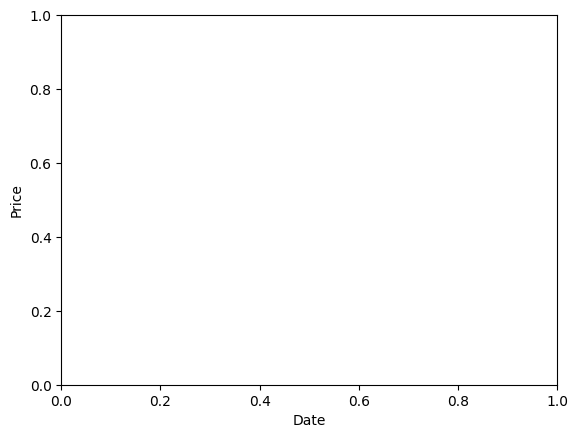

In [29]:
ply.xlabel('Date')
ply.ylabel('Price')
indexdataset = newdata.set_index(['Arrival Date'])

In [33]:
indexdataset
indexdatasetnew = indexdataset['Modal Price(Rs./Quintal)']
indexdatasetnew.isna().sum()

0

In [ ]:
import plotly.express as px
fig = px.line(mydata, x="Datereal", y="Arrivals (Tonnes)", template = 'plotly_dark')
fig.show()

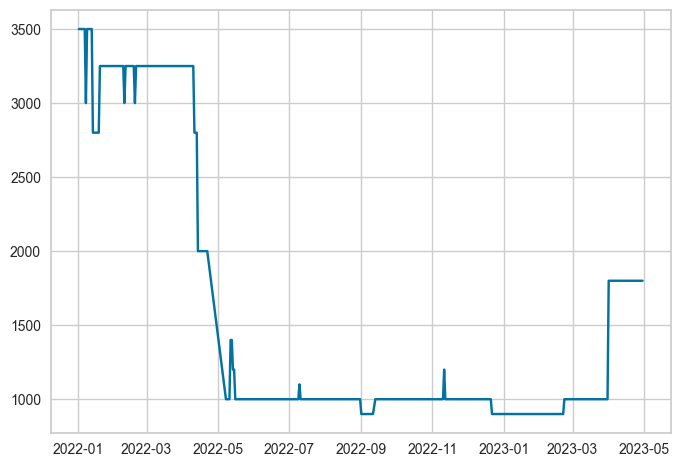

In [ ]:
ply.plot(indexdatasetnew)

In [ ]:
brolmean = indexdatasetnew.rolling(window=365).mean()
rolstd = indexdatasetnew.rolling(window=365).std()
# print(rolmean,rolstd)

In [ ]:
rolmeanmonth = indexdatasetnew.rolling(window=30).mean()
rolstdmonth = indexdatasetnew.rolling(window=30).std()
print(rolmeanmonth.head(50),rolstdmonth)

Arrival Date
2022-01-02            NaN
2022-01-03            NaN
2022-01-04            NaN
2022-01-05            NaN
2022-01-06            NaN
2022-01-07            NaN
2022-01-08            NaN
2022-01-09            NaN
2022-01-10            NaN
2022-01-11            NaN
2022-01-12            NaN
2022-01-13            NaN
2022-01-14            NaN
2022-01-15            NaN
2022-01-16            NaN
2022-01-17            NaN
2022-01-18            NaN
2022-01-19            NaN
2022-01-20            NaN
2022-01-21            NaN
2022-01-22            NaN
2022-01-23            NaN
2022-01-24            NaN
2022-01-25            NaN
2022-01-26            NaN
2022-01-27            NaN
2022-01-28            NaN
2022-01-29            NaN
2022-01-30            NaN
2022-01-31    3243.333333
2022-02-01    3235.000000
2022-02-02    3226.666667
2022-02-03    3218.333333
2022-02-04    3210.000000
2022-02-05    3201.666667
2022-02-06    3193.333333
2022-02-07    3201.666667
2022-02-08    3193.333333

In [ ]:
rolmeanday = indexdatasetnew.rolling(window=1).mean()
rolstdday = indexdatasetnew.rolling(window=1).std()
print(rolmeanday.head(50),rolstdday)

Arrival Date
2022-01-02    3500.0
2022-01-03    3500.0
2022-01-04    3500.0
2022-01-05    3500.0
2022-01-06    3500.0
2022-01-07    3500.0
2022-01-08    3000.0
2022-01-09    3500.0
2022-01-10    3500.0
2022-01-11    3500.0
2022-01-12    3500.0
2022-01-13    3500.0
2022-01-14    2800.0
2022-01-15    2800.0
2022-01-16    2800.0
2022-01-17    2800.0
2022-01-18    2800.0
2022-01-19    2800.0
2022-01-20    3250.0
2022-01-21    3250.0
2022-01-22    3250.0
2022-01-23    3250.0
2022-01-24    3250.0
2022-01-25    3250.0
2022-01-26    3250.0
2022-01-27    3250.0
2022-01-28    3250.0
2022-01-29    3250.0
2022-01-30    3250.0
2022-01-31    3250.0
2022-02-01    3250.0
2022-02-02    3250.0
2022-02-03    3250.0
2022-02-04    3250.0
2022-02-05    3250.0
2022-02-06    3250.0
2022-02-07    3250.0
2022-02-08    3250.0
2022-02-09    3250.0
2022-02-10    3000.0
2022-02-11    3250.0
2022-02-12    3250.0
2022-02-13    3250.0
2022-02-14    3250.0
2022-02-15    3250.0
2022-02-16    3250.0
2022-02-17    3250.0


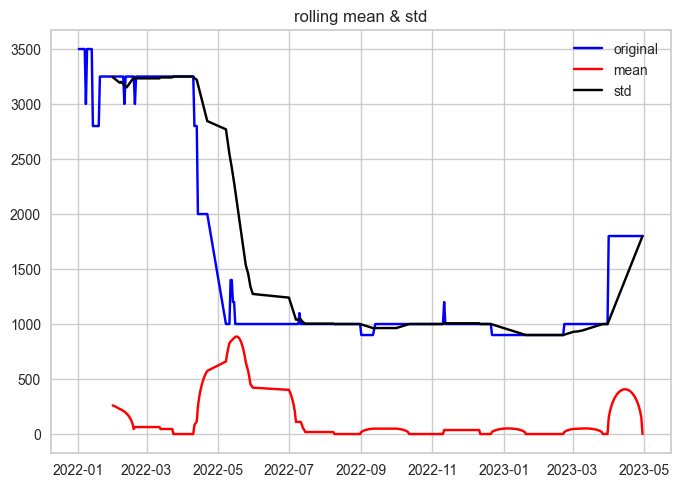

In [ ]:
#plots
original = ply.plot(indexdatasetnew,color='blue',label='original')
mean = ply.plot(rolstdmonth,color='red',label='mean')
std = ply.plot(rolmeanmonth,color='black',label='std')
ply.legend(loc='best')
ply.title('rolling mean & std')
ply.show(block=False)


In [ ]:
# dicky fuller test
from statsmodels.tsa.stattools import adfuller
print('test results:-')
dftest = adfuller(indexdatasetnew,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','No of observation used'])
for key,value in dftest[4].items():
    dfoutput[key] = value

print(dfoutput)

test results:-
Test Statistic             -2.143801
p-value                     0.227271
#Lags used                  9.000000
No of observation used    414.000000
1%                         -3.446244
5%                         -2.868547
10%                        -2.570502
dtype: float64


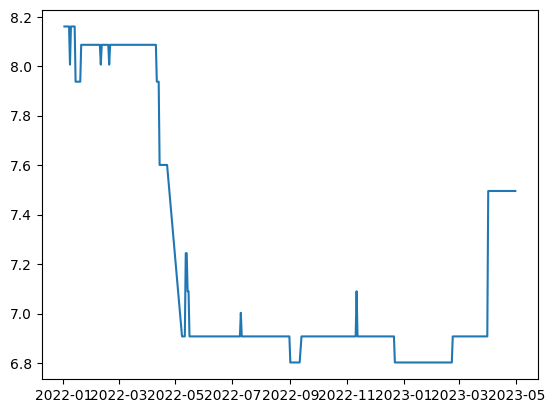

In [34]:
#test estimation
indexdata_log = np.log(indexdatasetnew)
ply.plot(indexdata_log)

In [35]:
indexdata_log.isna().sum()

0

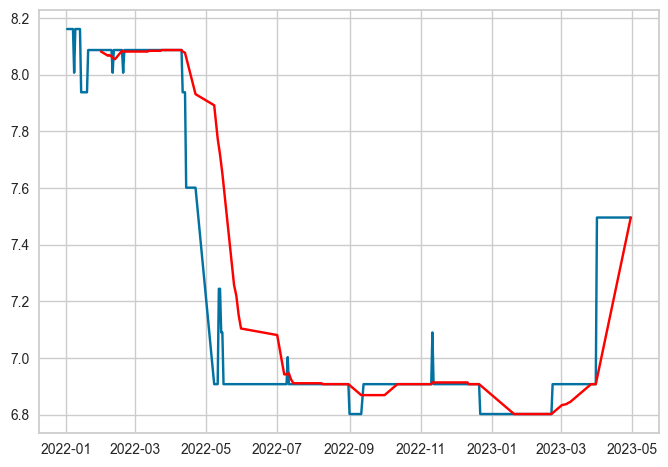

In [ ]:
ma = indexdata_log.rolling(window=30).mean()
mastd = indexdata_log.rolling(window=30).std()
ply.plot(indexdata_log)
ply.plot(ma,color='red')

In [ ]:
datalogminusmovinga = indexdata_log-ma
datalogminusmovinga


Arrival Date
2022-01-02         NaN
2022-01-03         NaN
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
                ...   
2023-04-26    0.078372
2023-04-27    0.058779
2023-04-28    0.039186
2023-04-29    0.019593
2023-04-30    0.000000
Name: Modal Price(Rs./Quintal), Length: 424, dtype: float64

In [ ]:
#removing nan values
datalogminusmovinga.dropna(inplace=True)
datalogminusmovinga

Arrival Date
2022-01-31    0.005302
2022-02-01    0.007773
2022-02-02    0.010243
2022-02-03    0.012713
2022-02-04    0.015183
                ...   
2023-04-26    0.078372
2023-04-27    0.058779
2023-04-28    0.039186
2023-04-29    0.019593
2023-04-30    0.000000
Name: Modal Price(Rs./Quintal), Length: 395, dtype: float64

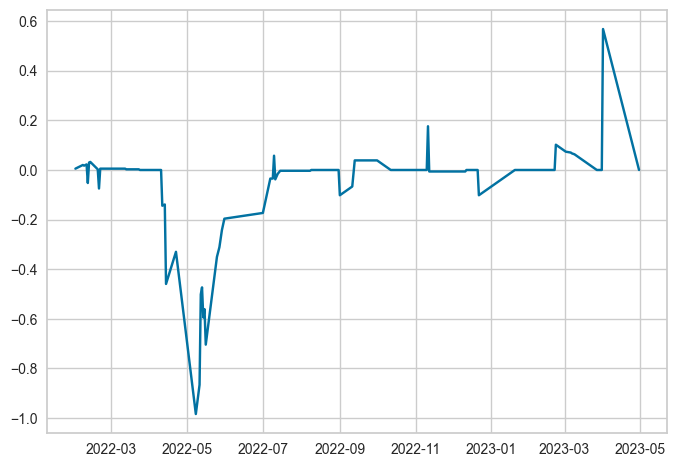

In [ ]:
ply.plot(datalogminusmovinga)

In [ ]:

# complete adc test
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    ma = timeseries.rolling(window=30).mean()
    mastd = timeseries.rolling(window=30).std()
    origin = ply.plot(timeseries,color='blue',label='original')
    mean = ply.plot(ma,color='red',label='Rolling mean')
    std = ply.plot(mastd,color='black',label='rolling std')
    ply.legend(loc='best')
    ply.title('Rolling mean and std')
    ply.show(block=False)
    print('test results:-')
    dftest = adfuller(indexdatasetnew,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','No of observation used'])
    for key,value in dftest[4].items():
        dfoutput[key] = value

    print(dfoutput)


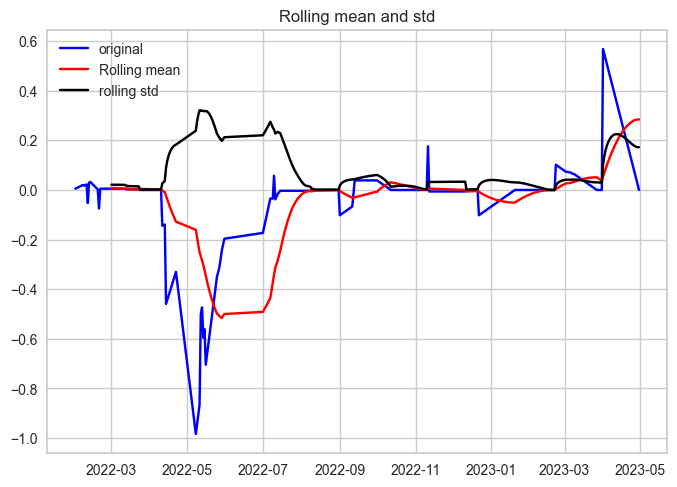

test results:-
Test Statistic             -2.143801
p-value                     0.227271
#Lags used                  9.000000
No of observation used    414.000000
1%                         -3.446244
5%                         -2.868547
10%                        -2.570502
dtype: float64


In [ ]:
test_stationary(datalogminusmovinga)

# we can see that our p value is same as before and its above 0.05 therefore it is not stationary yet

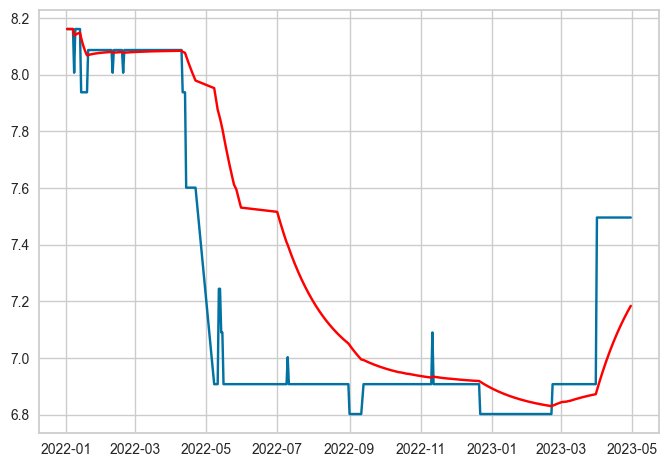

In [ ]:
#weighted average
weightav = indexdata_log.ewm(halflife=30,min_periods=0,adjust=True).mean()
ply.plot(indexdata_log)
ply.plot(weightav,color='red')

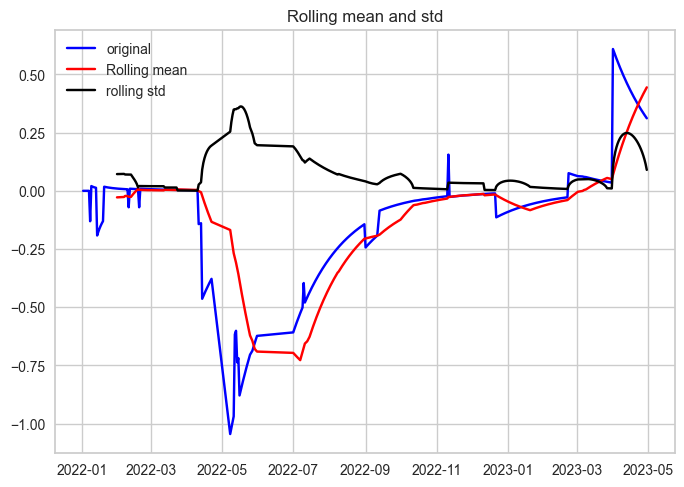

test results:-
Test Statistic             -2.143801
p-value                     0.227271
#Lags used                  9.000000
No of observation used    414.000000
1%                         -3.446244
5%                         -2.868547
10%                        -2.570502
dtype: float64


In [ ]:
#logscale minus exp decay
logscaleminusexpweightedav = indexdata_log - weightav
test_stationary(logscaleminusexpweightedav)

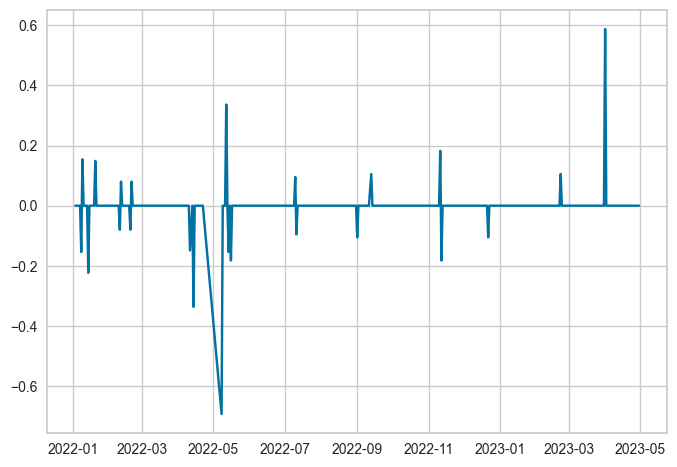

In [ ]:
datasetlogshifting = indexdata_log - indexdata_log.shift()
ply.plot(datasetlogshifting)

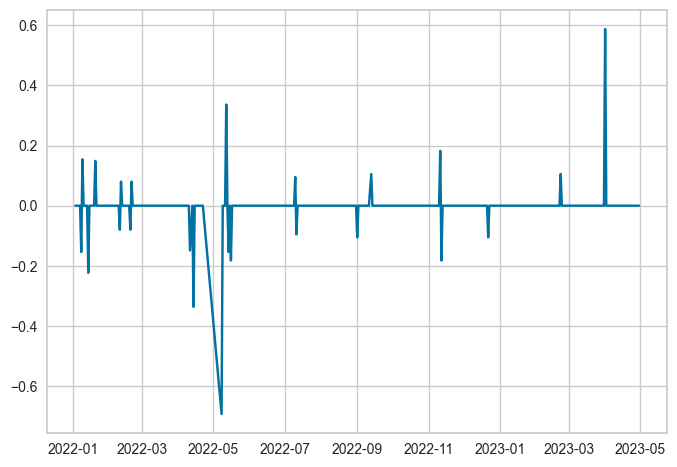

In [ ]:
datasetlogshifting.dropna(inplace=True)
ply.plot(datasetlogshifting)

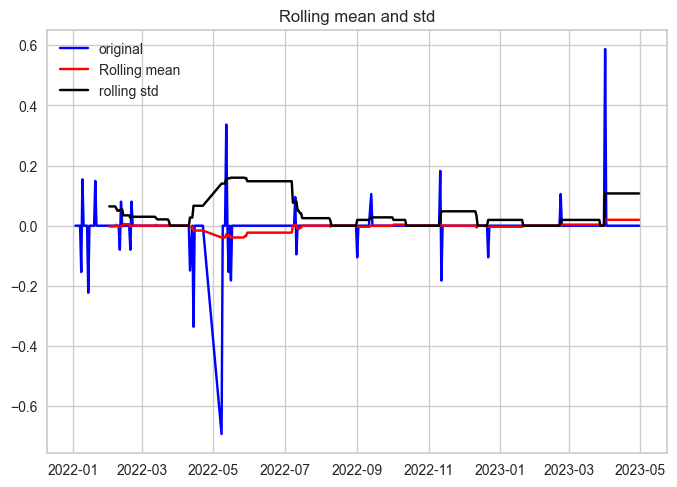

test results:-
Test Statistic             -2.143801
p-value                     0.227271
#Lags used                  9.000000
No of observation used    414.000000
1%                         -3.446244
5%                         -2.868547
10%                        -2.570502
dtype: float64


In [ ]:
test_stationary(datasetlogshifting)

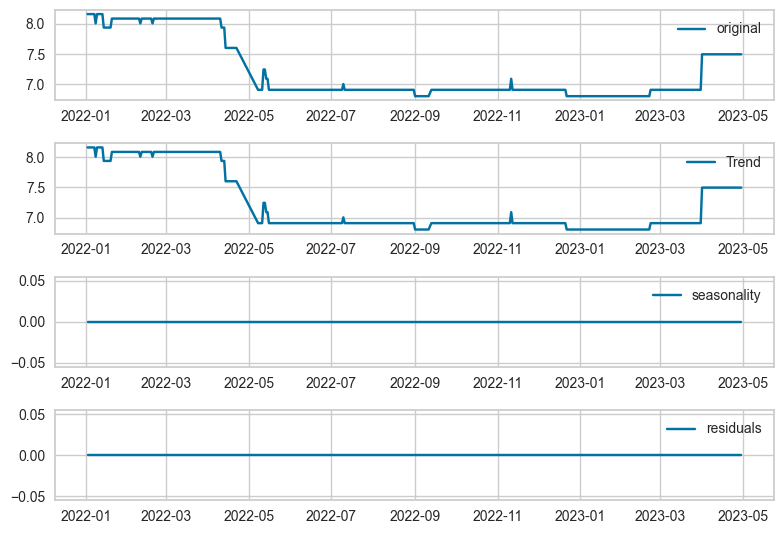

In [ ]:
#seasonal decompose for seasons in agricluture

from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(indexdata_log,period=1)

trend = decompostion.trend
seasonal = decompostion.seasonal
resiual = decompostion.resid

ply.subplot(411)
ply.plot(indexdata_log,label='original')
ply.legend(loc='best')
ply.subplot(412)
ply.plot(trend,label='Trend')
ply.legend(loc='best')
ply.subplot(413)
ply.plot(seasonal,label='seasonality')
ply.legend(loc='best')
ply.subplot(414)
ply.plot(resiual,label='residuals')
ply.legend(loc='best')
ply.tight_layout()


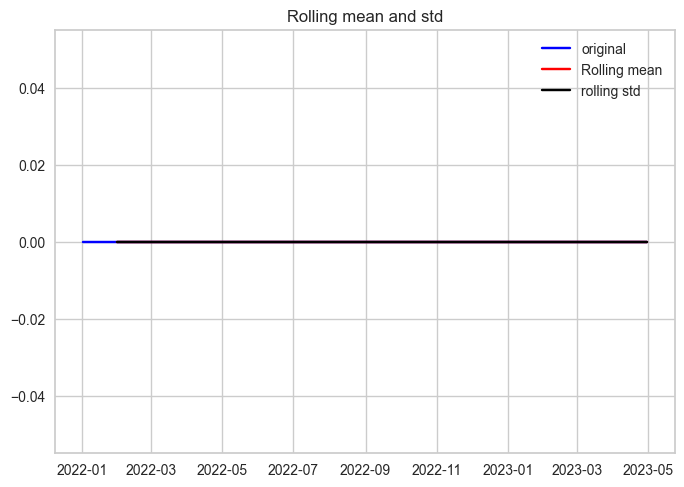

test results:-
Test Statistic             -2.143801
p-value                     0.227271
#Lags used                  9.000000
No of observation used    414.000000
1%                         -3.446244
5%                         -2.868547
10%                        -2.570502
dtype: float64


In [ ]:
decomposedloggdata = resiual
decomposedloggdata.dropna(inplace=True)
test_stationary(decomposedloggdata)

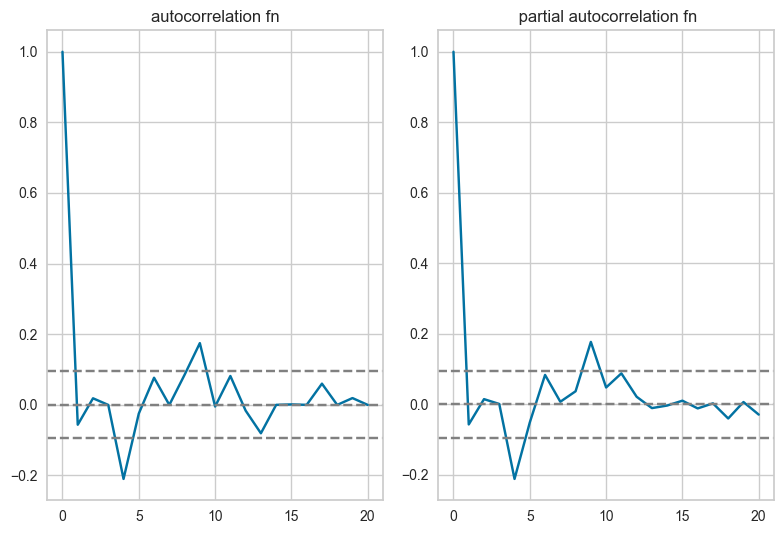

In [ ]:
#acf and pacf

from statsmodels.tsa.stattools import acf,pacf

log_acf = acf(datasetlogshifting,nlags=20)
log_pacf = pacf(datasetlogshifting,nlags=20,method='ols')

#plots
ply.subplot(121)
ply.plot(log_acf)
ply.axhline(y=0,linestyle='--',color='gray')
ply.axhline(y=-1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
ply.axhline(y=1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
ply.title('autocorrelation fn')


ply.subplot(122)
ply.plot(log_pacf)
ply.axhline(y=0,linestyle='--',color='gray')
ply.axhline(y=-1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
ply.axhline(y=1.96/np.sqrt(len(datasetlogshifting)),linestyle='--',color='gray')
ply.title(' partial autocorrelation fn')
ply.tight_layout()


plotting ar model


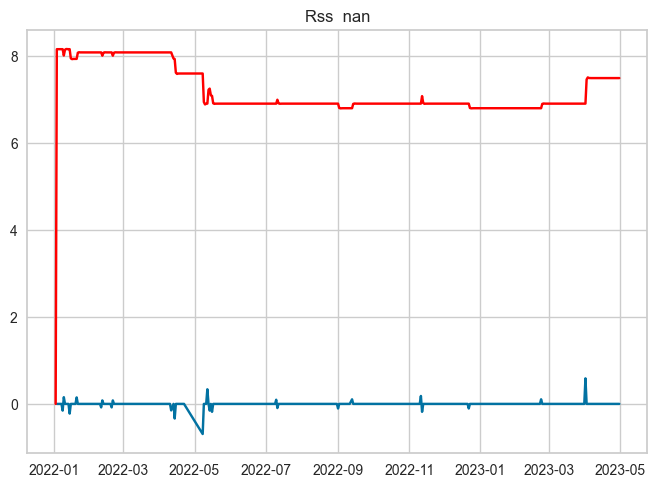

In [ ]:
#arima
from statsmodels.tsa.arima.model import ARIMA
#ar model
model = ARIMA(indexdata_log,order=(0,1,2))
result_ar = model.fit()
ply.plot(datasetlogshifting)
ply.plot(result_ar.fittedvalues,color='red')
ply.title('Rss % .4f'% sum((result_ar.fittedvalues- datasetlogshifting) ** 2))
print('plotting ar model')

plotting ar model


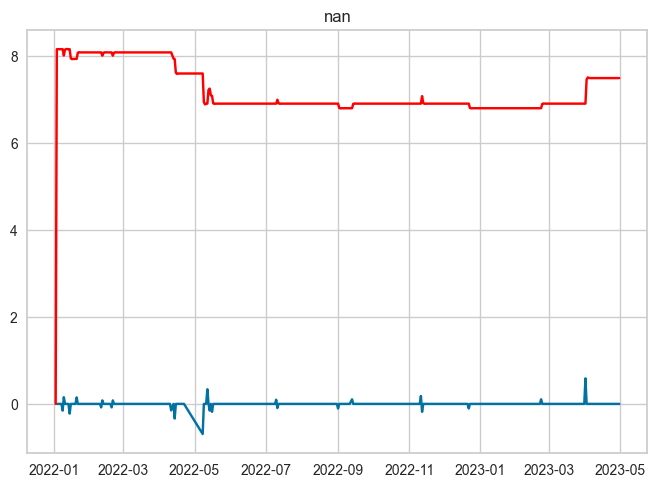

In [ ]:
# ma  model the p and q values determine if the model is ar or mr
# order = (p,i,q)
#  i - differnecing order
modelma = ARIMA(indexdata_log,order=(2,1,0))
result_ma = model.fit()
ply.plot(datasetlogshifting)
ply.plot(result_ma.fittedvalues,color='red')
ply.title( sum((result_ma.fittedvalues- datasetlogshifting) ** 2))
print('plotting ar model')


plotting ar model


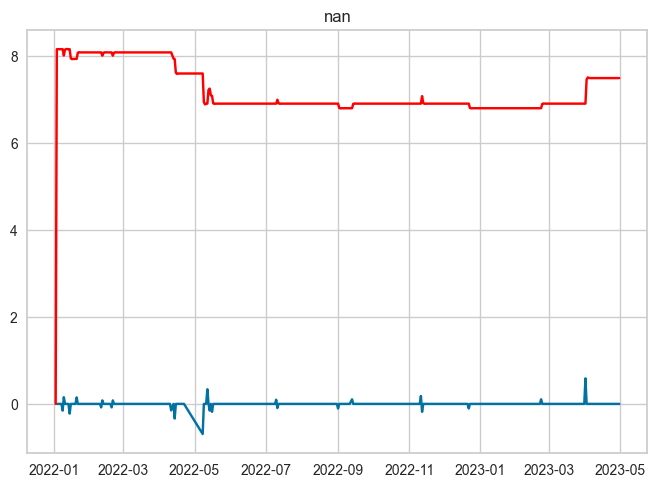

In [ ]:
# Arima note that the rss should be minimum
modelarima = ARIMA(indexdata_log,order=(2,1,2))
result_arima = model.fit()
ply.plot(datasetlogshifting)
ply.plot(result_arima.fittedvalues,color='red')
ply.title( sum((result_arima.fittedvalues- datasetlogshifting) ** 2))
print('plotting ar model')


In [ ]:
predict_arima  = pd.Series(result_arima.fittedvalues,copy=True)
print(predict_arima)

Arrival Date
2022-01-02    0.000000
2022-01-03    8.160518
2022-01-04    8.160518
2022-01-05    8.160518
2022-01-06    8.160518
                ...   
2023-04-26    7.495542
2023-04-27    7.495542
2023-04-28    7.495542
2023-04-29    7.495542
2023-04-30    7.495542
Length: 424, dtype: float64


## data transformation back to the normal data

In [ ]:
# cummulative sum
pred_arima_diff_cumsum = predict_arima.cumsum()
pred_arima_diff_cumsum

Arrival Date
2022-01-02       0.000000
2022-01-03       8.160518
2022-01-04      16.321036
2022-01-05      24.481555
2022-01-06      32.642073
                 ...     
2023-04-26    3022.635173
2023-04-27    3030.130715
2023-04-28    3037.626257
2023-04-29    3045.121799
2023-04-30    3052.617341
Length: 424, dtype: float64

In [ ]:
predict_arima_log = pd.Series(indexdata_log.iloc[0],index=indexdata_log.index)
predict_arima_log = predict_arima_log.add(pred_arima_diff_cumsum,fill_value=0)
predict_arima_log.head()

Arrival Date
2022-01-02     8.160518
2022-01-03    16.321036
2022-01-04    24.481555
2022-01-05    32.642073
2022-01-06    40.802591
dtype: float64

In [ ]:
indexdata_log.iloc[0]

8.160518247477505

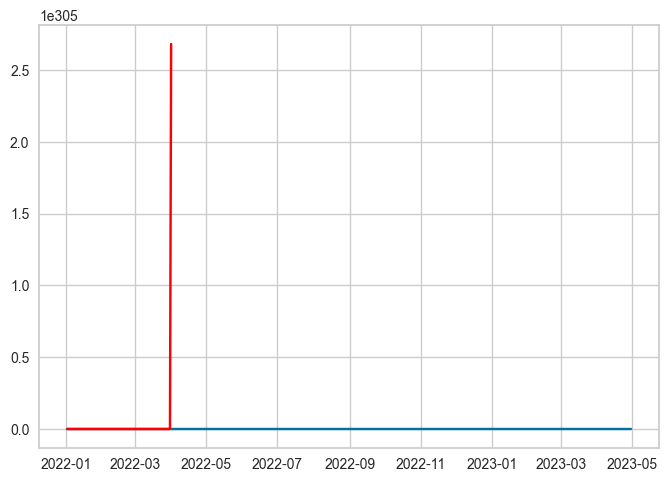

In [ ]:
predictions_arima = np.exp(predict_arima_log)
ply.plot(indexdatasetnew)
ply.plot(predictions_arima,color='red')

In [ ]:
indexdata_log

Arrival Date
2022-01-02    8.160518
2022-01-03    8.160518
2022-01-04    8.160518
2022-01-05    8.160518
2022-01-06    8.160518
                ...   
2023-04-26    7.495542
2023-04-27    7.495542
2023-04-28    7.495542
2023-04-29    7.495542
2023-04-30    7.495542
Name: Modal Price(Rs./Quintal), Length: 424, dtype: float64

In [ ]:
result_arima

424    7.495542
425    7.495542
426    7.495542
427    7.495542
428    7.495542
429    7.495542
430    7.495542
431    7.495542
432    7.495542
433    7.495542
434    7.495542
435    7.495542
Name: predicted_mean, dtype: float64

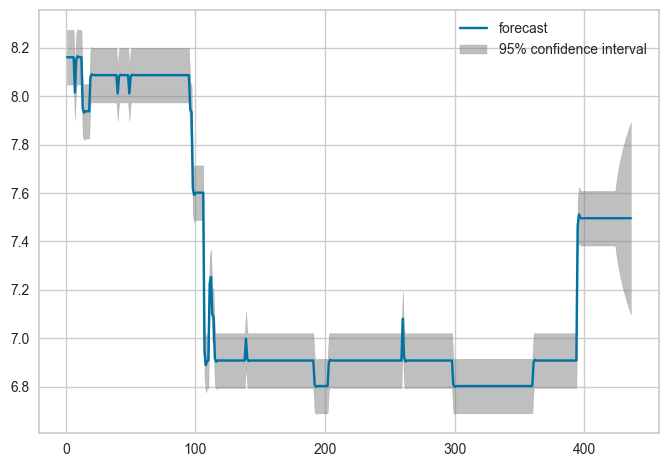

In [ ]:
# if you waant to predict for 12 years than steps  = 120
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result_arima,1,424+12)
x = result_arima.forecast(steps=12)
x